# Conversions

Convert between core hypergraph types by dropping direction, time, or layer information.
Duplicate hyperedges are merged by **summing weights**. Edge metadata is merged
by accumulating conflicting values into lists while preserving order.

**Weighted by default:** core classes are weighted by default; unweighted graphs
must be created with `weighted=False`.


## Overview

- Convert between hypergraph types while preserving weights and metadata.
- Verify conversion outcomes with quick sanity checks and visuals.


## Setup


In [ ]:
import matplotlib as mpl

mpl.rcParams.update({
    "figure.figsize": (6, 4),
    "figure.dpi": 120,
    "savefig.dpi": 150,
})


In [1]:
import hypergraphx as hgx


## Directed to Hypergraph
Direction is dropped by merging sources and targets. If two directed edges map
to the same undirected hyperedge, their weights are summed and metadata merged.


In [2]:
dh = hgx.DirectedHypergraph(weighted=True)
dh.add_edge(((0, 1), (2,)), weight=2.0, metadata={"kind": "a"})
dh.add_edge(((2,), (0, 1)), weight=3.0, metadata={"kind": "b", "tag": 1})
hg = dh.to_hypergraph()
hg.get_edges(), hg.get_weight((0, 1, 2)), hg.get_edge_metadata((0, 1, 2))


([(0, 1, 2)], 5.0, {'kind': ['a', 'b'], 'tag': 1})

## Temporal to Hypergraph
Time is dropped. Multiple events of the same hyperedge across time are merged.


In [3]:
th = hgx.TemporalHypergraph(weighted=True)
th.add_edge((0, 1), time=1, weight=1.0, metadata={"t": 1})
th.add_edge((0, 1), time=2, weight=2.0, metadata={"t": 2})
th.add_edge((1, 2), time=3, weight=3.0)
hg = th.to_hypergraph()
hg.get_edges(), hg.get_weight((0, 1)), hg.get_edge_metadata((0, 1))


([(0, 1), (1, 2)], 3.0, {'t': [1, 2]})

## Multiplex to Hypergraph
Layer is dropped. Edges across layers are merged by summing weights.


In [4]:
mx = hgx.MultiplexHypergraph(weighted=True)
mx.add_edge((0, 1), layer="L1", weight=1.0, metadata={"layer": "L1"})
mx.add_edge((0, 1), layer="L2", weight=2.0, metadata={"layer": "L2"})
hg = mx.to_hypergraph()
hg.get_edges(), hg.get_weight((0, 1)), hg.get_edge_metadata((0, 1))


([(0, 1)], 3.0, {'layer': ['L1', 'L2']})

## Unweighted inputs become weighted counts
Unweighted temporal/multiplex inputs are converted to weighted hypergraphs where
the weight equals the number of occurrences.


In [5]:
th_u = hgx.TemporalHypergraph(weighted=False)
th_u.add_edge((0, 1), time=1)
th_u.add_edge((0, 1), time=2)
hg_u = th_u.to_hypergraph()
hg_u.is_weighted(), hg_u.get_weight((0, 1))


(True, 2)

## Quick visual sanity check
Visualize the converted hypergraph to confirm merged hyperedges.


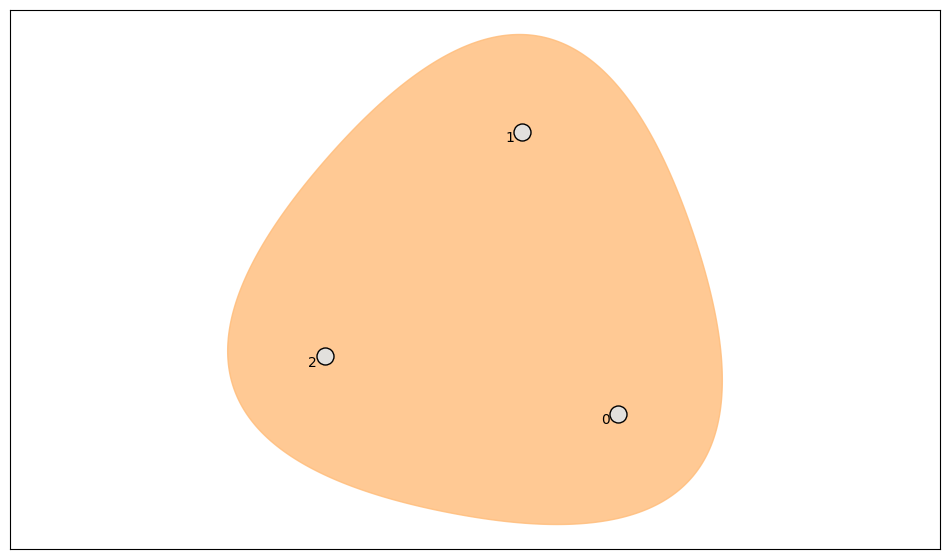

In [6]:
import matplotlib.pyplot as plt
from hypergraphx.viz.draw_hypergraph import draw_hypergraph

dh_viz = hgx.DirectedHypergraph(weighted=True)
dh_viz.add_edge(((0, 1), (2,)), weight=1.0)
dh_viz.add_edge(((2,), (0, 1)), weight=1.0)
hg_viz = dh_viz.to_hypergraph()

draw_hypergraph(hg_viz, with_node_labels=True)
plt.show()


## Metadata control
You can drop node/edge/hypergraph metadata during conversion.


In [7]:
mx2 = hgx.MultiplexHypergraph(weighted=True)
mx2.add_node(0, metadata={"role": "root"})
mx2.add_edge((0, 1), layer="L1", weight=1.0, metadata={"tag": "x"})
hg2 = mx2.to_hypergraph(keep_node_metadata=False, keep_edge_metadata=False, keep_hypergraph_metadata=False)
hg2.get_node_metadata(0), hg2.get_edge_metadata((0, 1)), hg2.get_hypergraph_metadata()


({}, {}, {'weighted': True, 'type': 'Hypergraph'})